In [3]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set_theme(style="whitegrid")

In [14]:
from sklearn.model_selection import train_test_split

In [8]:
import xgboost

In [26]:
def process(df):
    """processing and transforming of data.function retuns prepared dataset for training or evaluation"""
    df_inc = pre_process(df)
    df_cat = cat_values_processing(df_inc)
    df_num = num_values_process(df_inc)    
    df_int = post_process(df_cat, df_num)
    
    if 'price_doc' in df.columns:
        y = df_int['price_doc']
    else:
        y = null
        
    X = df_int.drop('price_doc', axis = 1)
    return X, y

In [ ]:
def cat_values_process(df):
    """fill na"""
    return df

In [ ]:
def num_values_process(df):
    """data transforming"""
    return df

In [ ]:
def pre_process(df):
    """OHE"""
    return df

In [ ]:
def post_process(df_cat, df_num):
    """merge"""
    df_int = df_cat.merge(df_num)
    return df_int

In [2]:
df = pd.read_csv('project_data/attempt_4/train.csv')

NameError: name 'pd' is not defined

In [11]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [21]:
df.shape

(30471, 292)

In [ ]:
df.info()

In [12]:
df.isna().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [7]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [1]:
df.columns()

NameError: name 'df' is not defined

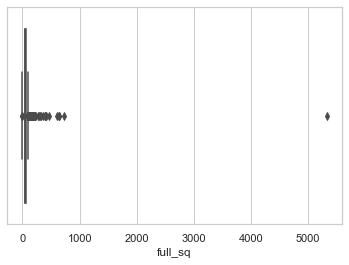

In [18]:
ax = sns.boxplot(x = df.full_sq)

In [25]:
df.full_sq.describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

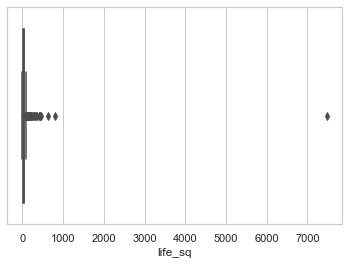

In [22]:
ax = sns.boxplot(x = df.life_sq)

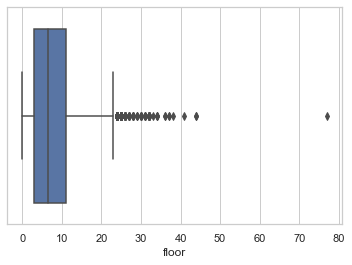

In [27]:
ax = sns.boxplot(x = df.floor)

In [9]:
df_extra = pd.read_csv('project_data/attempt_4/macro.csv')

In [ ]:
df_extra.tail()

In [10]:
df_extra.describe()

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


In [ ]:
# processing of metainformation and combining of data to one complex koefficient which should be applied to prices.
def totals_cast(df):
    """"""
    return casted_df

In [29]:
df_extra.shape

(2484, 100)

In [ ]:
X, y = process(df)

In [ ]:
X_train, y_train, X_valid, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 33)